# Image Blending - Feathering Effects

In [1]:
import numpy as np
from PIL import Image
from skimage.io import imsave
import matplotlib.pyplot as plt
import cv2

### Choose Your Blending Location

In [2]:
x_start = 180
y_start = 250

### Load Input Images and Display

Text(0.5,1,'background image - dimension: (479, 600, 3)')

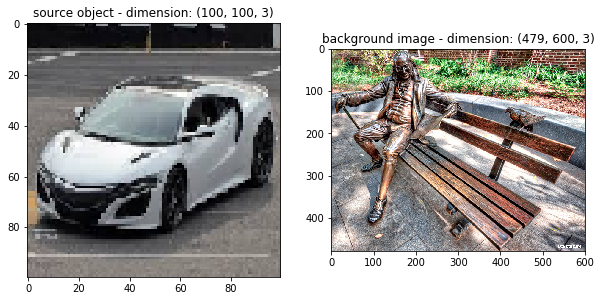

In [3]:
background_img_path = "TargetImage.png"
source_img_path = "SourceImage.png"
background_img = np.array(Image.open(background_img_path).convert('RGB'))
source_img = np.array(Image.open(source_img_path).convert('RGB'))

plt.rcParams["figure.figsize"] = [10, 10]
plt.subplot(1,2,1)
plt.imshow(source_img)
plt.title('source object - dimension: '+str(source_img.shape))
plt.subplot(1,2,2)
plt.imshow(background_img)
plt.title('background image - dimension: '+str(background_img.shape))

(-0.5, 99.5, 99.5, -0.5)

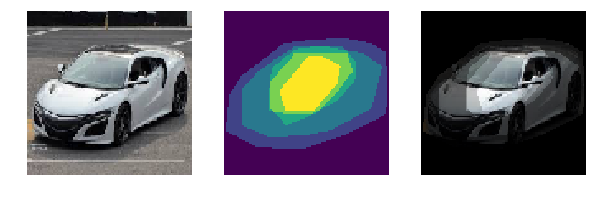

In [4]:
num_mask = 5

alpha_mask = np.zeros((source_img.shape[0], source_img.shape[1]))
for i in range(num_mask):
    mask = np.loadtxt('masks/mask_'+str(i)+'.txt')
    alpha_mask = alpha_mask + mask
alpha_mask = alpha_mask/num_mask

source_img = np.array(Image.open(source_img_path).convert('RGB'))
source_obj = np.zeros((source_img.shape[0], source_img.shape[1], 3))
for i in range(3):
    source_obj[:,:,i] = source_img[:,:,i]*alpha_mask 

# create canvas source image and canvas mask
canvas_source_img = np.zeros((background_img.shape))
canvas_source_img[x_start:source_obj.shape[0]+x_start, y_start:source_obj.shape[1]+y_start] = source_obj
canvas_mask = np.zeros((background_img.shape[0], background_img.shape[1]))
canvas_mask[x_start:source_obj.shape[0]+x_start, y_start:source_obj.shape[1]+y_start] = alpha_mask

plt.rcParams["figure.figsize"] = [10, 10]
plt.subplot(1,3,1)
plt.imshow(source_img)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(alpha_mask)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(source_obj/255)
plt.axis('off')

(-0.5, 599.5, 478.5, -0.5)

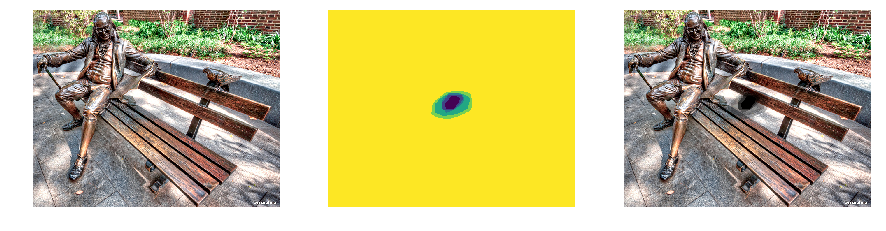

In [5]:
mask_source = canvas_mask
mask_target = np.zeros((mask_source.shape))
for i in range(mask_source.shape[0]):
    for j in range(mask_source.shape[1]):
        mask_target[i,j] = 1 - mask_source[i,j]

back_target = np.zeros((background_img.shape))
for i in range(3):
    back_target[:,:,i] = background_img[:,:,i]*mask_target

plt.rcParams["figure.figsize"] = [15, 15]    
plt.subplot(1,3,1)
plt.imshow(background_img)
plt.axis('off')
        
plt.subplot(1,3,2)
plt.imshow(mask_target)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(back_target/255)
plt.axis('off')

/Users/owen/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


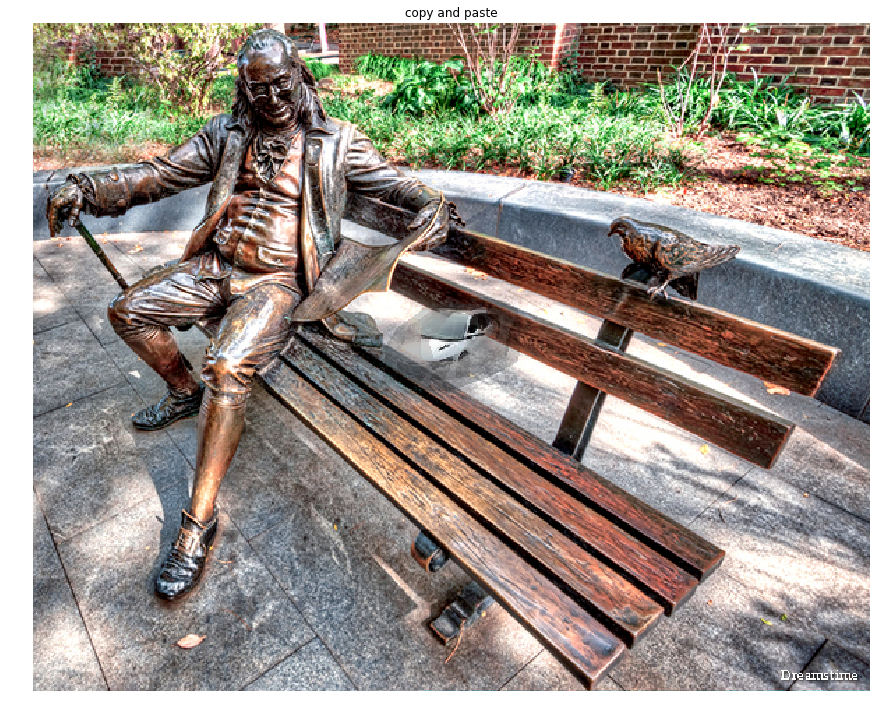

In [6]:
output_img = np.zeros((background_img.shape))

source_image = canvas_source_img
target_image = background_img
source_mask = mask_source
target_mask = mask_target
    
for i in range(3):
    output_img[:,:,i] = source_image[:,:,i]*source_mask+target_image[:,:,i]*target_mask

plt.figure()
plt.imshow(output_img/255)
plt.axis('off')
plt.title('copy and paste')
imsave('outputs/copy_paste_output.jpg', output_img/255)